In [47]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State
import numpy as np

In [39]:
def learn(iterations = 3000, epsilon = 0.1, alpha = 0.7, gamma = 0.9, penalty = 0.1):
    # Load the maze
    file = "../data/easy_maze.txt"
    maze = Maze(file)

    # Set the reward at the bottom right to 10
    start_x,start_y=0,0
    end_x,end_y=24,14
    maze.set_reward(maze.get_state(end_x,end_y), 10)

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(start_x, start_y)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    stop = False


    # keep learning until you decide to stop
    end_state=State(end_x,end_y,1)
    numbers_of_steps = []
    count=0
    while count<iterations:
        history=[]
        # print("finding path")
        while not (robot.x==-1 and robot.y==-1):
            state=robot.get_state(maze)
            # print("position:"+" "+str(robot.x)+" "+str(robot.y))
            action = selection.get_egreedy_action(robot,maze,learn,end_state,epsilon)
            # print(learn.get_q(robot.get_state(maze),action))
            new_state=robot.do_action(action,maze)
            history.append([state,action,new_state])
        for t in history:
            possible_actions=maze.get_valid_actions(Agent(t[2].x,t[2].y),end_state)
            learn.update_q(t[0],t[1],maze.get_reward(t[0]),t[2],possible_actions,penalty,alpha,gamma)
        robot.reset()
        count += 1
        numbers_of_steps.append(len(history))

    # print("generating path")
    actions=[]
    while not (robot.x==-1 and robot.y==-1):
        action = selection.get_best_action(robot,maze,learn,end_state)
        robot.do_action(action,maze)
        actions.append(action.id)
    # print(actions)
    return numbers_of_steps, actions

In [54]:
y = []
optimal = []
for i in range(1, 11):
    res = learn(epsilon=0.01)
    optimal.append(len(res[1]))
    y.append(res[0])

np.savetxt("../data/10_runs_e=0.01.txt", np.array(y, np.int32))

Ready reading maze file ../data/easy_maze.txt
Made EGreedy
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
Ready reading maze file ../data/easy_maze.txt
Made EGreedy
Ready reading maze file ../data/easy_maze.txt
Made EGreedy


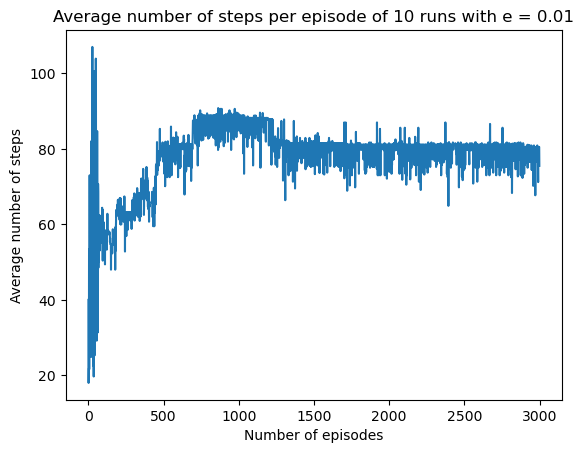

In [55]:
import matplotlib.pyplot as plt 

def plot_avg(file, e):
    runs = np.loadtxt(file)
    avg_runs = np.mean(runs, axis = 0)

    plt.title("Average number of steps per episode of 10 runs with e = " + str(e))
    plt.xlabel("Number of episodes")
    plt.ylabel("Average number of steps")
    plt.plot(avg_runs)
    plt.show()

plot_avg("../data/10_runs_e=0.01.txt", 0.01)    

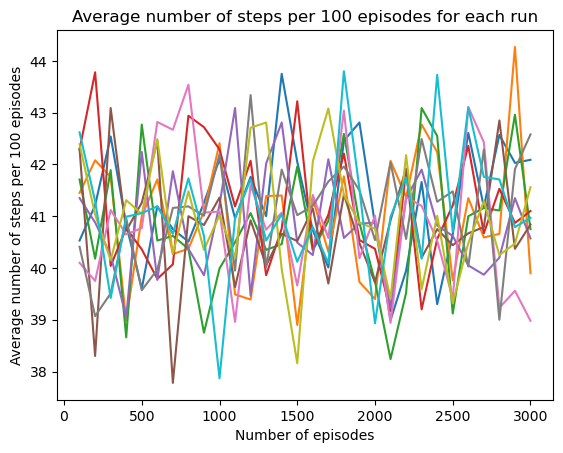

In [37]:
def plot_all(file, e):
    runs = np.loadtxt(file)    
    y_shorten = []  
    x_shorten = []
    step_size = 100

    for run in runs:
        run_shorten = []
        for i in range(1, int(3000 / step_size) + 1):
            start = (i - 1) * step_size
            end = start + step_size 
            avg = np.average(run[start : end])
            run_shorten.append(avg)
        y_shorten.append(run_shorten)    

    for i in range(1,  int(3000 / step_size) + 1):
        x_shorten.append(i * step_size)

    plt.title("Average number of steps per " + str(step_size) + " episodes for each run")
    plt.xlabel("Number of episodes")
    plt.ylabel("Average number of steps per " + str(step_size) + " episodes")
    for run in y_shorten:
        plt.plot(x_shorten, run)
    plt.show()

In [13]:
file_path = "../data/easy_solution.txt"
f = open(file_path, "w")
string = ""
string += str(len(actions))
string += ";\n"
string += str(0) + ", " + str(0)
string += ";\n"
for i in actions:
    if(i == "right"):
        string += str(0)
        string += ";\n"
    elif(i == "left"):
        string += str(2)
        string += ";\n"                
    elif(i == "up"):
        string += str(1)
        string += ";\n"
    elif(i == "down"):
        string += str(3)
        string += ";\n"
print(string)
f.write(string)

79;
0, 0;
3;
3;
3;
0;
3;
3;
2;
3;
3;
0;
0;
0;
0;
0;
0;
0;
0;
0;
0;
3;
3;
2;
2;
2;
2;
2;
3;
3;
0;
0;
0;
0;
3;
3;
3;
0;
0;
1;
1;
1;
0;
0;
3;
3;
3;
0;
0;
1;
1;
1;
0;
0;
0;
0;
0;
0;
0;
1;
1;
1;
1;
1;
1;
1;
1;
0;
0;
3;
3;
3;
3;
3;
3;
3;
3;
3;
3;
3;



244

In [3]:
print(learn.q)

{<State.State object at 0x00000157FF871DC0>: {<Action.Action object at 0x00000157FF86E550>: 0.0, <Action.Action object at 0x00000157FF86EC10>: 0.0}, <State.State object at 0x00000157FF8691C0>: {<Action.Action object at 0x00000157FF86EF70>: 0.0, <Action.Action object at 0x00000157FF86EC10>: 0.0, <Action.Action object at 0x00000157FF86EBB0>: 0.0}, <State.State object at 0x00000157FF8681C0>: {<Action.Action object at 0x00000157FF86EF70>: 0.0, <Action.Action object at 0x00000157FF86EC10>: 0.0}, <State.State object at 0x00000157FF869220>: {<Action.Action object at 0x00000157FF86E550>: 0.0, <Action.Action object at 0x00000157FF86EBB0>: 0.0}, <State.State object at 0x00000157FF871D60>: {<Action.Action object at 0x00000157FF86EBB0>: 0.0}, <State.State object at 0x00000157FF869280>: {<Action.Action object at 0x00000157FF86E550>: 0.0, <Action.Action object at 0x00000157FF86EF70>: 0.0}, <State.State object at 0x00000157FF871E80>: {<Action.Action object at 0x00000157FF86EC10>: 0.0}, <State.State o